## Keras: A high level neural network library

In this exercise we will revisit regression and classification using simple neural networks. To do so we will use Keras, a popular neural network package now maintained by Google. Keras is a high level library that allows rapid prototyping of neural networks due to its precompiled layers, just as Scikit-learn contains a number of prebuilt classifiers.


## Installing Keras

Detailed installation instructions can be found at https://keras.io/#installation

Installation is at two step process:
1. Install a deep learning backend (Tensorflow recommended)

``` pip install tensorflow ```
2. Install Keras

``` pip install Keras ```


To start the demo, we have a 2D dataset so we can visualize what the network is doing.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

Neural networks are so popular now due to their ability to quickly learn nonlinear boundaries. So, we have an example that would be impossible for a linear classifier and demonstrate how a neural network can be used to solve this. As you can see, in the dataset below there is no straight line that you can draw that perfectly separates the red and blue classes

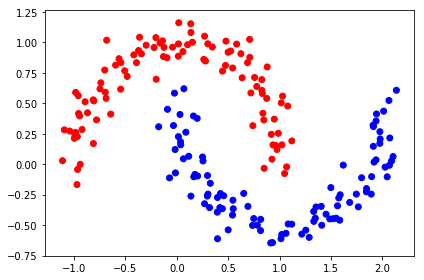

In [2]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import lenses_dataset, get_colors


X, y = lenses_dataset()

# For consistent color plotting:

cmap=get_colors(y)

plt.scatter(X[:, 0], X [:, 1], c=y, cmap=cmap)
plt.tight_layout()
plt.show()

Let's split it into a training and testing set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

We will build a Perceptron using Keras as an example-- Recall that a perceptron is a 0 hidden layer neural network with a single output unit. In Keras terms, it's a single Dense layer with 1 unit. 

We will build this perceptron with a sigmoidal output (so it outputs a probability of class 1) and the binary_crossentropy loss function (which corresponds to sigmoid).

In [5]:
# Relevant imports
from keras.models import Sequential
# Keras refers to an architecture in which the outputs of 
# one layer are the inputs to the next as "Sequential"
from keras.layers import Dense
# Everything we've talked about in class so far is referred to in 
# Keras as a "dense" connection between layers, where every input 
# unit connects to a unit in the next layer
from keras.optimizers import SGD
# SGD is the learning algorithm we will use

# Exercise 1:

In [6]:

#Let's first create neural network with 1 layer 
# To add a layer to the architecture, you would simply use .add(LAYER).
# Each "input_dim" of each layer should be the number units in the previous layer 
# (in this case the input), and the number of "units" should be the number of 
# outputs of the layer (in this case it will be 1).


#Write your code here: (2 lines)
perceptron = Sequential()
perceptron.add(Dense(1,input_dim=2,activation='sigmoid'))


Now we specify how to optimize the neural network. We mentioned gradient descent and stochastic gradient descent in class. Let's use the latter here and compile the model. We also specify the error function as "binary_crossentropy". (The explanation is beyond the scope of this demo) 

In [7]:
sgd = SGD(lr=0.001, decay=1e-7, momentum=.9)  # Stochastic gradient descent
perceptron.compile(loss="binary_crossentropy", optimizer=sgd)


In [8]:
#Now we train the built perceptron
#Write your code here: (1 line)
perceptron.fit(X_train,y_train)

Epoch 1/1
160/160 [==============================] - 0s 3ms/step - loss: 0.4145


In [9]:
from utils import get_accuracy

In [10]:
# And test it on training and test set 
get_accuracy(perceptron, X_test, y_test)

0.875

Text(12.375,0.5,'Test')

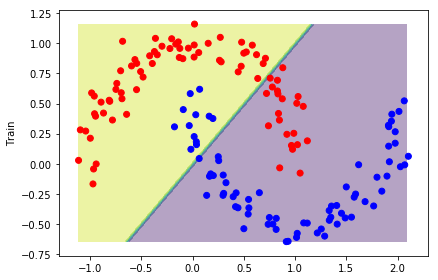

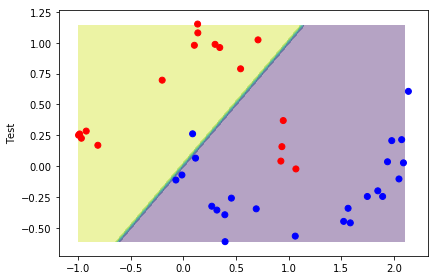

In [11]:
from utils import visualize_2d_classification
f, ax = visualize_2d_classification(perceptron, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(perceptron, X_test, y_test)
ax.set_ylabel("Test")

Recall that a perceptron is nothing more than a linear classifier, which is trying to separate our data using a line. It turns out that the introduction of hidden layers allows us to draw "lines" in higher dimensions, which, when mapped back into our original 2d space, look may look nonlinear.

# Exercise 2:

For the first exercise, use Keras to create a 2 layer neural network by completing build_one_output_model() in exercise_3.py. Recall that our input is 2-D and output has 2 possible classes, so the neural network will have an input layer of 2. Hence, we will then add one hidden layer and an output layer of 1 (corresponding to our classes- sometimes referred to as a "readout" layer). 

The model has already been initialized and the optimizer and loss function have been defined for you.

For your intermediate layers, use "relu" as the activation function, and "sigmoid" (as the demo above) for your output layer.

In [12]:
from exercise_3 import build_one_output_model
model = build_one_output_model()

In [13]:
model.fit(X_train, y_train, epochs=300, batch_size=16, verbose=0)
get_accuracy(model, X_test, y_test)

0.875

Text(12.375,0.5,'Test')

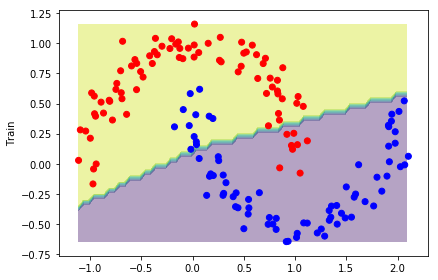

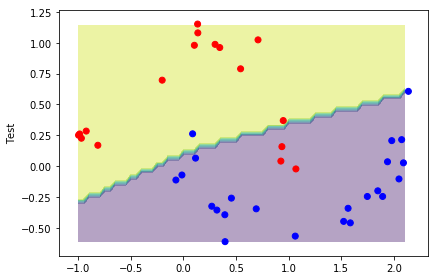

In [14]:
# And visualize how your model did
f, ax = visualize_2d_classification(model, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(model, X_test, y_test)
ax.set_ylabel("Test")


It is actually quite rare for a neural network to have a single output unit as we've implemented above. Usually we have a $k$ unit output layer, where $k$ is your number of outputs. This is typically done because when combined with the "softmax" activation function (also beyond the scope of this exercise), the activity of each unit corresponds with the probability of that class. This allows us to easily extend to multiclass classification.

Now we will still work with two units, but map them to two output units rather than 1. class 0 will be [1, 0], and class 1 will be [0, 1]. This operation is referred to as "one hot encoding". It is easy to convert between labels (i.e. [1,2,3]) to their one-hot encoded counterparts:

In [15]:
# Before we can fit the network, we have to one-hot vectorize our response.
# Fortunately, there is a keras method for that.
from keras.utils import to_categorical

y_train_vectorized = to_categorical(y_train)

In [16]:
print("Label | One-hot")
for i in range(10):
    print("{} | {}".format(y_train[i], y_train_vectorized[i]))

Label | One-hot
0 | [1. 0.]
1 | [0. 1.]
1 | [0. 1.]
1 | [0. 1.]
1 | [0. 1.]
1 | [0. 1.]
0 | [1. 0.]
0 | [1. 0.]
0 | [1. 0.]
0 | [1. 0.]


The one hot encoded vectors will serve as future labels for our models. 

# Exercise 3: 

Implement build_classification_model() in exercise_3.py that returns a sequential model that takes an input of size 2, passes it to a hidden layer of size 10, then a hidden layer of size 5, then a readout layer of size 2. 


As before, use the "relu" activation function for hidden layers, but since we have multiple output units, use the "softmax" activation for the final layer.

The optimizer and loss function have been filled in for you.

In [17]:
from exercise_3 import build_classification_model

In [18]:
model = build_classification_model()

Use the below calls to test your implementation

In [19]:
model.fit(X_train, y_train_vectorized, epochs=10, batch_size=50, verbose = 1)

Epoch 1/10
160/160 [==============================] - 0s 2ms/step - loss: 0.6823 - acc: 0.4812
Epoch 2/10
160/160 [==============================] - 0s 74us/step - loss: 0.6815 - acc: 0.4812
Epoch 3/10
160/160 [==============================] - 0s 105us/step - loss: 0.6802 - acc: 0.4687
Epoch 4/10
160/160 [==============================] - 0s 223us/step - loss: 0.6786 - acc: 0.4500
Epoch 5/10
160/160 [==============================] - 0s 152us/step - loss: 0.6768 - acc: 0.4313
Epoch 6/10
160/160 [==============================] - 0s 149us/step - loss: 0.6748 - acc: 0.4250
Epoch 7/10
160/160 [==============================] - 0s 96us/step - loss: 0.6727 - acc: 0.4062
Epoch 8/10
160/160 [==============================] - 0s 220us/step - loss: 0.6705 - acc: 0.4312
Epoch 9/10
160/160 [==============================] - 0s 180us/step - loss: 0.6682 - acc: 0.4750
Epoch 10/10
160/160 [==============================] - 0s 124us/step - loss: 0.6661 - acc: 0.5250


In [20]:
get_accuracy(model, X_test, y_test)

0.7

In [21]:
# with more hidden units, it typically takes more training to converge
# remember every time you call this cell it will pick up from where it left off
model.fit(X_train, y_train_vectorized, epochs=1000, batch_size=16, verbose=0)

In [22]:
get_accuracy(model, X_test, y_test)

1.0

Text(12.375,0.5,'Test')

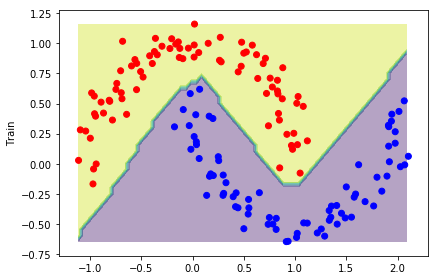

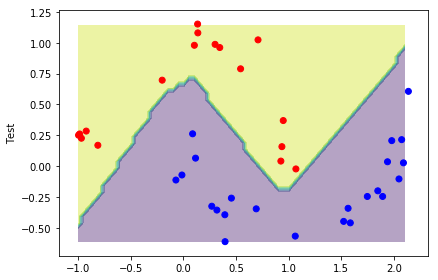

In [23]:
# And visualize how your model did
f, ax = visualize_2d_classification(model, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(model, X_test, y_test)
ax.set_ylabel("Test")

# Exercise 4:

Now let's revisit the classification problem from last week. Build a neural network to predict the output from last week's dataset. Recall that the input is 50 features, and the output is a single class (which you may want to convert to a one-hot vector). The architecture choice is up to you, but you are required to  use Dense layers only.

Please build your model in the build_final_model() function in exercise_3.py and use the below functions to train/test your code. You are not given validation data, so it may be helpful to create your own.

In [36]:
from exercise_3 import build_final_model

In [37]:
df = pd.read_csv("train_50features.csv")
X = df.drop("y", axis=1)
y = df["y"]
#y_vectorized = to_categorical(y)
X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=.2)
y_train_vectorized = to_categorical(y_train)

In [42]:
model = build_final_model()

In [43]:
model.fit(X_train, y_train_vectorized, epochs=10, batch_size=50, verbose=1)

Epoch 1/10
80/80 [==============================] - 0s 5ms/step - loss: 0.2753 - acc: 0.5000
Epoch 2/10
80/80 [==============================] - 0s 91us/step - loss: 0.2750 - acc: 0.5000
Epoch 3/10
80/80 [==============================] - 0s 118us/step - loss: 0.2746 - acc: 0.5000
Epoch 4/10
80/80 [==============================] - 0s 118us/step - loss: 0.2740 - acc: 0.5000
Epoch 5/10
80/80 [==============================] - 0s 254us/step - loss: 0.2733 - acc: 0.5000
Epoch 6/10
80/80 [==============================] - 0s 168us/step - loss: 0.2725 - acc: 0.5000
Epoch 7/10
80/80 [==============================] - 0s 212us/step - loss: 0.2716 - acc: 0.4875
Epoch 8/10
80/80 [==============================] - 0s 219us/step - loss: 0.2707 - acc: 0.4875
Epoch 9/10
80/80 [==============================] - 0s 236us/step - loss: 0.2696 - acc: 0.4875
Epoch 10/10
80/80 [==============================] - 0s 174us/step - loss: 0.2687 - acc: 0.4875


Add more cells as necessary to fit the model below

In [44]:
get_accuracy(model, X_dev, y_dev)

0.65

After you are happy with your fitted model, run the below cell to generate the output.

In [45]:
X_test = pd.read_csv("test_50features.csv")
predicted = model.predict_classes(X_test)
with open("exercise_3_output.txt", "w") as f:
    [f.write("{}\n".format(p)) for p in predicted]